In this notebook we compare the translational mobility coefficients for a pair of passive spheres for 

 - Superposition/Pystokes
 - 2s (2s - similar to FTS Stokesian dynamics, but without adhoc lubrication effects)
 - 2s, 3t (3t)
 - 2s, 3t, 3a (3a)
 - 2s, 3t, 3a, 3s (long-ranged)
 
 to the exact solution given by **Goldmann, Cox and Brenner (1966)** using bipolar coordinates finding exact numerical values for the terminal speed of two spheres sedimenting, later re-used by **Batchelor (1971)**, and also **Ladd (1988)**. 

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt

import pystokes
from solveSuperPos import linearSolve_krylov as SP
from solve2s import linearSolve_krylov as _2S
from solve3t import linearSolve_krylov as _3T
from solve3a import linearSolve_krylov as _3A
from solveLongRanged import linearSolve_krylov as LR

In [2]:
PI = 3.14159265359

# particle radius, self-propulsion speed, number and fluid viscosity
b, Np, eta = 1.0, 2, 0.1

## passive particle
D0  = 0.      
S0  = 0.

## normalising factor: one-particle mobility
mu0 = 1./(6*PI*eta*b)

The results are compared at the nine fixed ratios $r/b$, where $r$ is the centre-to-centre distance: $2.0,\, 2.0049,\, 2.0907,\, 2.2553,\, 2.6749,\, 3.0862,\, 4.0,\, 6.0,\, 8.0$

In [3]:
rb = np.array([2.0, 2.0049, 2.0907, 2.2553, 2.6749, 3.0862, 4.0, 6.0, 8.0])

___________

### Exact results (normalised by $\mu_0$)

In [4]:
muPara = np.array([1.5500, 1.5494, 1.5376, 1.5160, 1.4662, 1.4236, 1.3472, 1.2427, 1.1847]) #force parallel to line of centers
muPerp = np.array([1.3799, 1.4027, 1.3933, 1.3648, 1.3029, 1.2586, 1.1950, 1.1273, 1.0947]) #force perpendicular to line of centers

____________

### PyStokes

In [5]:
pstk = pystokes.unbounded.Rbm(b, Np, eta)
## define distances that iterate through rb/2 and forces parallel and perpendicular to these distances 

pstk_muPara = np.zeros(rb.shape[0])
pstk_muPerp = np.zeros(rb.shape[0])


r, F, T, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)

## parallel
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force parallel to separation - along x axis
        F[i]      = 1.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 0.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
    
    pstk.mobilityTT(v,r,F)
    pstk.mobilityTR(v,r,T)
    pstk.mobilityRT(o,r,F)
    pstk.mobilityRR(o,r,T)
        
    pstk_muPara[k] = v[0]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1
    
## perpendicular
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force perpendicular to separation - along z axis
        F[i]      = 0.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 1.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
        
    pstk.mobilityTT(v,r,F)
    pstk.mobilityTR(v,r,T)
    pstk.mobilityRT(o,r,F)
    pstk.mobilityRR(o,r,T)
        
    pstk_muPerp[k] = v[4]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1

In [6]:
pstk_muPara/muPara

array([1.0483871 , 1.04820011, 1.04580903, 1.04084827, 1.02886353,
       1.01996004, 1.00903726, 1.00214885, 1.00071484])

In [7]:
pstk_muPerp/muPerp

array([1.04174216, 1.02383002, 1.01445853, 1.00830671, 1.0027698 ,
       1.00113384, 1.00026151, 1.00001314, 1.00002426])

___________

### Superposition approximation

In [8]:
sp = SP(b, Np, eta)
## define distances that iterate through rb/2 and forces parallel and perpendicular to these distances 

sp_muPara = np.zeros(rb.shape[0])
sp_muPerp = np.zeros(rb.shape[0])


r, F, T, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)

## parallel
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force parallel to separation - along x axis
        F[i]      = 1.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 0.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
    
    sp.RBM(v, o, r, F, T)
        
    sp_muPara[k] = v[0]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1
    
## perpendicular
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force perpendicular to separation - along z axis
        F[i]      = 0.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 1.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
        
    sp.RBM(v, o, r, F, T)
        
    sp_muPerp[k] = v[4]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1

In [9]:
sp_muPara/muPara

array([1.0483871 , 1.04820011, 1.04580903, 1.04084827, 1.02886353,
       1.01996004, 1.00903726, 1.00214885, 1.00071484])

In [10]:
sp_muPerp/muPerp

array([1.04174216, 1.02383002, 1.01445853, 1.00830671, 1.0027698 ,
       1.00113384, 1.00026151, 1.00001314, 1.00002426])

______________

## 2s mode (FTS Stokesian dynamics without lubrication corrections)

In [11]:
_2s = _2S(b, Np, eta)
## define distances that iterate through rb/2 and forces parallel and perpendicular to these distances 

_2s_muPara = np.zeros(rb.shape[0])
_2s_muPerp = np.zeros(rb.shape[0])


r, F, T, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)

S = np.zeros(6*Np)

## parallel
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force parallel to separation - along x axis
        F[i]      = 1.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 0.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
    
    _2s.RBM(v, o, r, F, T, S)
        
    _2s_muPara[k] = v[0]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1
    
## perpendicular
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force perpendicular to separation - along z axis
        F[i]      = 0.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 1.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
        
    _2s.RBM(v, o, r, F, T, S)
        
    _2s_muPerp[k] = v[4]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1

In [12]:
_2s_muPara/muPara

array([1.00483871, 1.00477753, 1.00465933, 1.00433347, 1.00320489,
       1.0021283 , 1.00077837, 1.00006777, 0.99998705])

In [13]:
_2s_muPerp/muPerp

array([1.03207962, 1.0145013 , 1.00766918, 1.00449563, 1.00175979,
       1.00080641, 1.00021933, 1.00001143, 1.00002409])

______________

## 3t mode

In [14]:
_3t = _3T(b, Np, eta)
## define distances that iterate through rb/2 and forces parallel and perpendicular to these distances 

_3t_muPara = np.zeros(rb.shape[0])
_3t_muPerp = np.zeros(rb.shape[0])


r, F, T, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)

S = np.zeros(6*Np)
D = np.zeros(3*Np)

## parallel
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force parallel to separation - along x axis
        F[i]      = 1.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 0.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
    
    _3t.RBM(v, o, r, F, T, S, D)
        
    _3t_muPara[k] = v[0]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1
    
## perpendicular
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force perpendicular to separation - along z axis
        F[i]      = 0.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 1.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
        
    _3t.RBM(v, o, r, F, T, S, D)
        
    _3t_muPerp[k] = v[4]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1

In [15]:
_3t_muPara/muPara

array([1.00483871, 1.00477753, 1.00465933, 1.00433347, 1.00320489,
       1.0021283 , 1.00077837, 1.00006777, 0.99998705])

In [16]:
_3t_muPerp/muPerp

array([1.03207962, 1.0145013 , 1.00766918, 1.00449563, 1.00175979,
       1.00080641, 1.00021933, 1.00001143, 1.00002409])

______________

## 3a mode

In [17]:
_3a = _3A(b, Np, eta)
## define distances that iterate through rb/2 and forces parallel and perpendicular to these distances 

_3a_muPara = np.zeros(rb.shape[0])
_3a_muPerp = np.zeros(rb.shape[0])


r, F, T, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)

S = np.zeros(6*Np)
D = np.zeros(3*Np)

## parallel
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force parallel to separation - along x axis
        F[i]      = 1.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 0.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
    
    _3a.RBM(v, o, r, F, T, S, D)
        
    _3a_muPara[k] = v[0]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1
    
## perpendicular
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force perpendicular to separation - along z axis
        F[i]      = 0.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 1.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
        
    _3a.RBM(v, o, r, F, T, S, D)
        
    _3a_muPerp[k] = v[4]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1

In [18]:
_3a_muPara/muPara

array([1.00483871, 1.00477753, 1.00465933, 1.00433347, 1.00320489,
       1.0021283 , 1.00077837, 1.00006777, 0.99998705])

In [19]:
_3a_muPerp/muPerp

array([1.02573726, 1.00832369, 1.00246364, 1.00076545, 1.00016705,
       1.00007343, 1.0000511 , 0.99999561, 1.00002119])

______________

## Long-ranged (2s, 3t, 3a, 3s)

In [20]:
lr = LR(b, Np, eta)
## define distances that iterate through rb/2 and forces parallel and perpendicular to these distances 

lr_muPara = np.zeros(rb.shape[0])
lr_muPerp = np.zeros(rb.shape[0])


r, F, T, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)

S = np.zeros(6*Np)
D = np.zeros(3*Np)

## parallel
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force parallel to separation - along x axis
        F[i]      = 1.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 0.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
    
    lr.RBM(v, o, r, F, T, S, D)
        
    lr_muPara[k] = v[0]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1
    
## perpendicular
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force perpendicular to separation - along z axis
        F[i]      = 0.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 1.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
        
    lr.RBM(v, o, r, F, T, S, D)
        
    lr_muPerp[k] = v[4]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1

In [21]:
lr_muPara/muPara

array([1.00064647, 1.00059064, 1.00057118, 1.00051222, 1.00039239,
       1.00027199, 1.00011381, 0.99997923, 0.99996878])

In [22]:
lr_muPerp/muPerp

array([1.02399627, 1.00666221, 1.00150611, 1.00047467, 1.00016657,
       1.00006048, 1.00003497, 0.99999241, 1.00002046])

________________

## Plotting

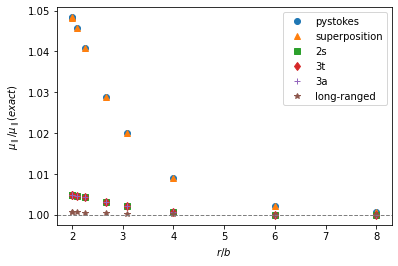

In [37]:
plt.plot(rb, pstk_muPara/muPara, label='pystokes', marker='o', linestyle="None")
plt.plot(rb, sp_muPara/muPara, label='superposition', marker='^', linestyle="None")
plt.plot(rb, _2s_muPara/muPara, label='2s', marker='s', linestyle="None")
plt.plot(rb, _3t_muPara/muPara, label='3t', marker='d', linestyle="None")
plt.plot(rb, _3a_muPara/muPara, label='3a', marker='+', linestyle="None")
plt.plot(rb, lr_muPara/muPara, label='long-ranged', marker='*', linestyle="None")
plt.axhline(y=1., color='grey', linestyle='--', linewidth=1)
plt.xlabel('$r/b$')
plt.ylabel('$\mu_\parallel/\mu_\parallel(exact)$')
plt.legend()
plt.show()

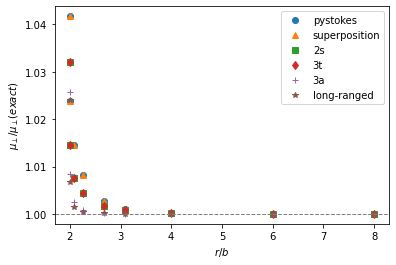

In [49]:
#plt.figure(figsize=(15,4))
plt.plot(rb, pstk_muPerp/muPerp, label='pystokes', marker='o', linestyle="None")
plt.plot(rb, sp_muPerp/muPerp, label='superposition', marker='^', linestyle="None")
plt.plot(rb, _2s_muPerp/muPerp, label='2s', marker='s', linestyle="None")
plt.plot(rb, _3t_muPerp/muPerp, label='3t', marker='d', linestyle="None")
plt.plot(rb, _3a_muPerp/muPerp, label='3a', marker='+', linestyle="None")
plt.plot(rb, lr_muPerp/muPerp, label='long-ranged', marker='*', linestyle="None")
plt.axhline(y=1., color='grey', linestyle='--', linewidth=1)
plt.xlabel('$r/b$')
plt.ylabel('$\mu_\perp/\mu_\perp(exact)$')
plt.legend()
plt.show()

In [50]:
_2s_muPara/_3t_muPara

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
_2s_muPerp/_3t_muPerp

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])